### Vamsi Krishna Jilla, Naresh Gajula
### 04-02-2024
### CVA, Satwik Kamarthi

In [64]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

### **Descriptive Analytics**

In [65]:
data_df = pd.read_csv('life expectancy.csv')
df1 = pd.read_csv('gdp.csv')

In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [67]:
data_df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [68]:
df1.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [69]:
df1 = df1.transpose()


df1.head(200)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,19313106301.7896,537777811.111111,10404280784.153099,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1387318093950.51001,NaN,NaN,NaN,7575396973.02288,713000000.0,1052990400.0
1961,NaN,19723488056.843899,548888895.555556,11128050589.282101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1443856420080.280029,NaN,NaN,NaN,7972996814.14993,696285714.285714,1096646600.0
1962,NaN,21493920015.015099,546666677.777778,11943353288.4767,NaN,NaN,NaN,NaN,NaN,24450604877.608101,...,NaN,NaN,NaN,1545480664614.919922,NaN,NaN,NaN,8497996604.37052,693142857.142857,1117601600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,3092430167.59777,985355704660.083008,18753469630.258598,683741574626.192017,122123822333.589996,13019689336.6919,3000180750.11297,2466442560038.419922,385605506848.195984,643628665302.155029,...,3794000000.0,223779865815.183014,880043553.748442,81193291658568.796875,832025573.983795,7180813375.50836,26840128755.364799,381448814653.455994,25873601260.8353,17584890936.652302
2018,3202188606.92893,1012853224905.790039,18053228578.887798,741691624372.787964,101353230784.593994,15156432309.897699,3218316013.22626,2730779681432.549805,422215043594.281982,524819742918.669006,...,3900000000.0,245213686369.157013,914727908.137793,86267600625419.40625,821286927.535723,7878508502.59802,21606140907.4454,404842116738.073975,26311590296.702099,18115543790.7855
2019,NaN,1009909855421.839966,18799450742.782299,794572474605.871948,89417190341.253296,15400242874.881201,3155065487.51819,2776468692322.959961,417215559513.364014,451932356085.84198,...,4068000000.0,261921244843.171997,934521604.602009,87568054407493.09375,852007112.724637,7899879086.43081,NaN,387934574098.169983,23308667781.2258,19284289739.051701
2020,NaN,920792331527.745972,20116137325.820599,784587603322.865967,58375976292.967796,14887629268.2927,NaN,2447584445275.52002,358868765174.924011,389288056265.325012,...,NaN,271158442448.536987,881547928.58381,84746979120044.5,807100820.648132,7716925356.12536,NaN,335442101366.416992,18110631358.311401,18051170798.941002


In [70]:
df1.columns = df1.iloc[0]

# Drop the first row after setting it as column names
df2 = df1[2:]
df2.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,19313106301.7896,537777811.111111,10404280784.153099,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1387318093950.51001,NaN,NaN,NaN,7575396973.02288,713000000.0,1052990400.0
1961,NaN,19723488056.843899,548888895.555556,11128050589.282101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1443856420080.280029,NaN,NaN,NaN,7972996814.14993,696285714.285714,1096646600.0
1962,NaN,21493920015.015099,546666677.777778,11943353288.4767,NaN,NaN,NaN,NaN,NaN,24450604877.608101,...,NaN,NaN,NaN,1545480664614.919922,NaN,NaN,NaN,8497996604.37052,693142857.142857,1117601600.0
1963,NaN,25733212133.783699,751111191.111111,12676515453.6754,NaN,NaN,NaN,NaN,NaN,18272123664.4715,...,NaN,NaN,NaN,1666137646532.850098,NaN,NaN,NaN,9423396234.599331,718714285.714286,1159511700.0
1964,NaN,23527443250.685001,800000044.444444,13838577015.184799,NaN,NaN,NaN,NaN,NaN,25605249381.759701,...,NaN,NaN,NaN,1824276762955.659912,NaN,NaN,NaN,10373995854.758699,839428571.428571,1217138000.0


In [71]:
data_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Year,3306.000000,2010.000000,5.478054,2001.000000,2005.000000,2010.000000,2015.000000,2019.000000
Life Expectancy World Bank,3118.000000,69.748362,9.408154,40.369000,63.642000,72.168500,76.809000,84.356341
Prevelance of Undernourishment,2622.000000,10.663654,11.285897,2.500000,2.500000,6.200000,14.775000,70.900000
CO2,3154.000000,157492.412690,772641.532760,10.000000,2002.499998,10204.999924,58772.499084,10707219.726562
Health Expenditure %,3126.000000,6.364059,2.842844,1.263576,4.205443,5.892352,8.119166,24.230680
Education Expenditure %,2216.000000,4.589014,2.119165,0.850320,3.136118,4.371465,5.519825,23.270000
Unemployment,3002.000000,7.890760,6.270832,0.100000,3.733000,5.920000,10.097500,37.250000
Corruption,975.000000,2.860513,0.621343,1.000000,2.500000,3.000000,3.250000,4.500000
Sanitation,2059.000000,52.738785,30.126762,2.377647,24.746007,49.317481,80.278847,100.000004
Injuries,3306.000000,1318219.451077,5214067.916349,430.490000,62456.877500,245690.960000,846559.122500,55636759.300000


In [72]:
data_df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [73]:
cols = data_df.columns
print(cols)

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')


In [74]:
numeric_cols = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
                'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
                'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']
data_df[numeric_cols] = data_df[numeric_cols].apply(pd.to_numeric, errors='coerce')


grouped = data_df.groupby('Country Code')

for col in numeric_cols:
    data_df[col] = grouped[col].transform(lambda x: x.fillna(
        x.shift().add(x.shift(-1)).div(2).fillna(method='ffill').fillna(method='bfill').fillna(method='ffill').fillna(method='bfill')))


data_df = data_df.dropna(axis=0)
data_df.head()


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
6,Armenia,ARM,Europe & Central Asia,Upper middle income,2001,71.800,26.1,3600.0,4.645627,2.46944,10.912,3.00,46.351896,103371.75,122238.13,767916.19
11,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,2001,67.054,17.0,26400.0,2.755907,3.50342,10.910,2.50,19.596700,235307.74,904186.52,1816141.16
16,Bangladesh,BGD,South Asia,Lower middle income,2001,65.956,15.9,25780.0,2.063751,2.17193,3.617,2.75,18.737007,5106399.34,29348014.24,20529108.23
23,Bolivia,BOL,Latin America & Caribbean,Lower middle income,2001,63.054,27.9,8050.0,4.825222,7.85500,2.485,3.25,28.913016,427941.60,1592197.06,1578651.87
28,Central African Republic,CAF,Sub-Saharan Africa,Low income,2001,44.061,39.2,250.0,3.955942,1.57205,5.693,2.50,19.630792,299925.65,3652351.14,745735.01


In [75]:
data_df.isnull().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [77]:

corruption_counts = data_df[['Country Name', 'Corruption']].groupby('Country Name').count().reset_index()


corruption_counts_sorted = corruption_counts.sort_values(by='Corruption')


corruption_counts_sorted


,Country Name,Corruption
0,Albania,2
23,Serbia,2
24,Sierra Leone,19
22,Senegal,19
21,Sao Tome and Principe,19
20,Samoa,19
19,Nepal,19
18,Myanmar,19
17,Mongolia,19
16,Mali,19


In [79]:

columns_to_sum = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
                  'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
                  'Corruption', 'Sanitation', 'Injuries']


sum_by_year = data_df.groupby('Year', as_index=False)[columns_to_sum].agg('sum')


sum_by_year


,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries
0,2001,1451.108000,660.0,1.072830e+06,117.352060,98.111280,193.703996,74.75,509.184258,72346410.13
1,2002,1460.063000,637.2,1.107100e+06,128.186275,99.246465,195.181001,74.75,523.178728,70448773.20
2,2003,1469.988000,617.8,1.142490e+06,128.532002,105.935755,193.721004,74.75,537.640408,68602087.86
3,2004,1480.839000,586.4,1.221670e+06,128.097608,105.429510,192.510000,74.75,553.119330,69929155.65
4,2005,1640.661146,564.9,1.336220e+06,142.316771,116.528590,228.094999,79.25,631.420557,70992931.50
5,2006,1654.076366,527.2,1.425900e+06,141.224394,112.623780,225.704998,80.75,648.279909,71590212.09
6,2007,1518.695000,488.2,1.495650e+06,126.768933,108.029575,188.178998,76.25,602.175636,71493538.55
7,2008,1532.658000,468.1,1.588980e+06,126.226510,107.536159,192.643001,75.25,618.709547,79637475.37
8,2009,1546.903000,431.4,1.732230e+06,136.352137,116.157530,198.909000,74.75,634.783874,71538820.71
9,2010,1561.178000,396.8,1.838060e+06,133.169935,109.040791,196.508002,74.75,651.181632,71863952.19


In [80]:

summary_stats = data_df.describe()


print("1. Summary Statistics:")
summary_stats

1. Summary Statistics:


,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,479.000000,479.000000,479.000000,4.790000e+02,479.000000,479.000000,479.000000,479.000000,479.000000,4.790000e+02,4.790000e+02,4.790000e+02
mean,2009.962422,62.464442,18.359290,7.447628e+04,5.391152,4.233182,7.646273,3.005219,26.136486,2.802494e+06,1.390385e+07,1.254412e+07
std,5.475568,8.540282,11.712604,3.406301e+05,2.561698,2.166763,7.266472,0.497613,16.333995,1.028313e+07,4.098373e+07,4.450048e+07
min,2001.000000,40.369000,2.500000,5.000000e+01,1.798268,0.850320,0.500000,2.000000,2.377647,3.268340e+03,8.627320e+03,2.449878e+04
25%,2005.000000,56.797500,8.950000,7.850000e+02,3.764728,2.704287,3.108000,2.500000,11.501169,1.707997e+05,4.394257e+05,8.043673e+05
50%,2010.000000,64.136000,15.700000,4.700000e+03,4.645627,3.748560,5.422000,3.000000,22.443638,3.847702e+05,3.538987e+06,1.853917e+06
75%,2015.000000,69.497000,25.900000,1.093500e+04,6.649766,5.226425,8.676500,3.500000,39.466565,8.408472e+05,8.500954e+06,4.049435e+06
max,2019.000000,75.423000,50.700000,2.456300e+06,20.413414,13.219570,34.634998,4.000000,67.762796,5.563676e+07,2.685646e+08,2.710974e+08


In [12]:
len(data_df.Year.unique())

19

In [13]:
# 3. Missing Values
missing_values = data_df.isnull().sum()
print("\n2. Missing Values:")
print(missing_values)


2. Missing Values:
Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [14]:
# 4. Data Types
data_types = data_df.dtypes
print("\n3. Data Types:")
print(data_types)


3. Data Types:
Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object


In [15]:
# 5. Correlation Analysis
correlation_matrix = data_df.corr()
print("\n4. Correlation Matrix:")
print(correlation_matrix)


4. Correlation Matrix:
                                    Year  Life Expectancy World Bank  \
Year                            1.000000                    0.203013   
Life Expectancy World Bank      0.203013                    1.000000   
Prevelance of Undernourishment -0.144081                   -0.686749   
CO2                             0.023258                    0.130382   
Health Expenditure %            0.093686                    0.326404   
Education Expenditure %         0.029346                    0.208019   
Unemployment                   -0.050321                   -0.056668   
Corruption                     -0.013471                    0.263566   
Sanitation                      0.117233                    0.680025   
Injuries                       -0.005951                   -0.006020   
Communicable                   -0.037286                   -0.217812   
NonCommunicable                 0.018347                    0.044476   

                                Prevela

In [16]:
# 6. Categorical Variables
categorical_cols = data_df.select_dtypes(include=['object'])
print("\n5. Categorical Variables:")
print(categorical_cols)


5. Categorical Variables:
              Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              IncomeGroup  
0              Low income  
1     Lower middle income  
2     Upper middle income  
3       

In [17]:
# Frequency of categorical variables
categorical_cols = ['Country Name', 'Country Code', 'Region', 'IncomeGroup']
for col in categorical_cols:
    print(data_df[col].value_counts())

Afghanistan          19
Nepal                19
Malawi               19
Malaysia             19
Namibia              19
                     ..
Guinea-Bissau        19
Equatorial Guinea    19
Greece               19
Grenada              19
Zimbabwe             19
Name: Country Name, Length: 174, dtype: int64
AFG    19
NPL    19
MWI    19
MYS    19
NAM    19
       ..
GNB    19
GNQ    19
GRC    19
GRD    19
ZWE    19
Name: Country Code, Length: 174, dtype: int64
Europe & Central Asia         893
Sub-Saharan Africa            836
Latin America & Caribbean     551
East Asia & Pacific           513
Middle East & North Africa    304
South Asia                    152
North America                  57
Name: Region, dtype: int64
High income            1083
Upper middle income     931
Lower middle income     855
Low income              437
Name: IncomeGroup, dtype: int64


### **Exploratory Analysis**

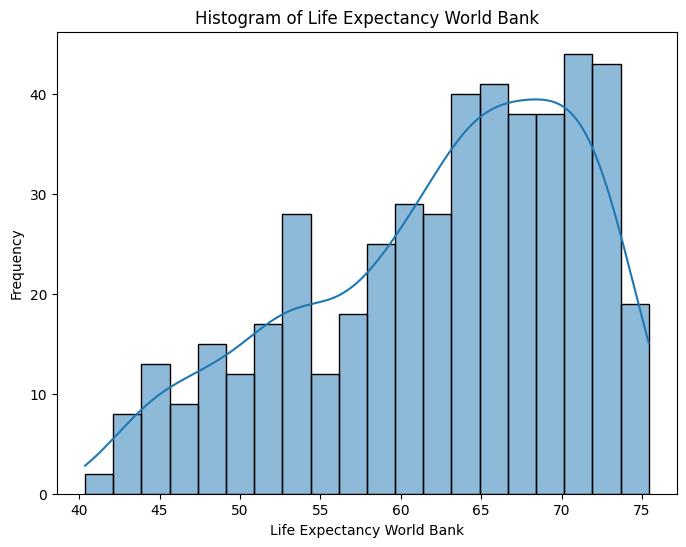

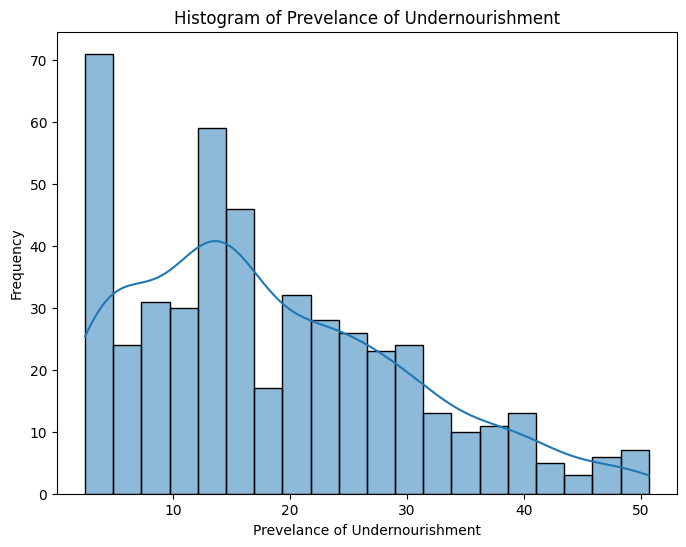

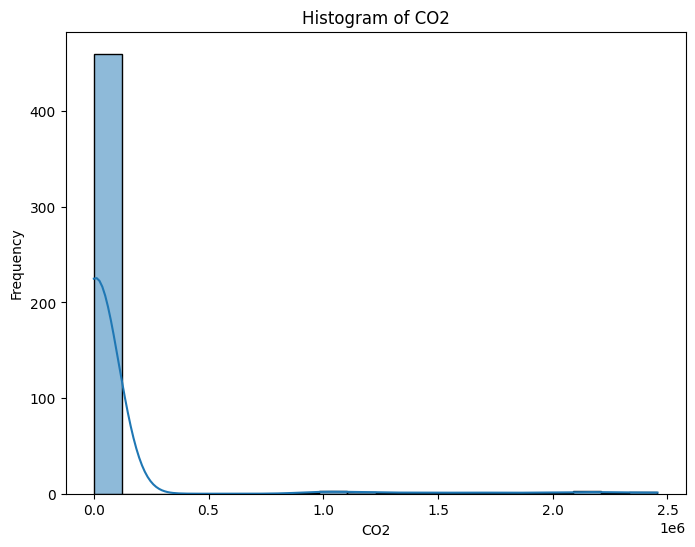

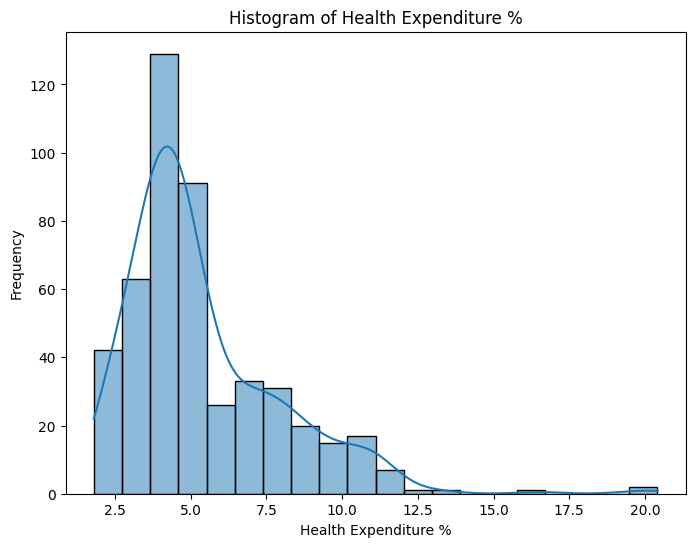

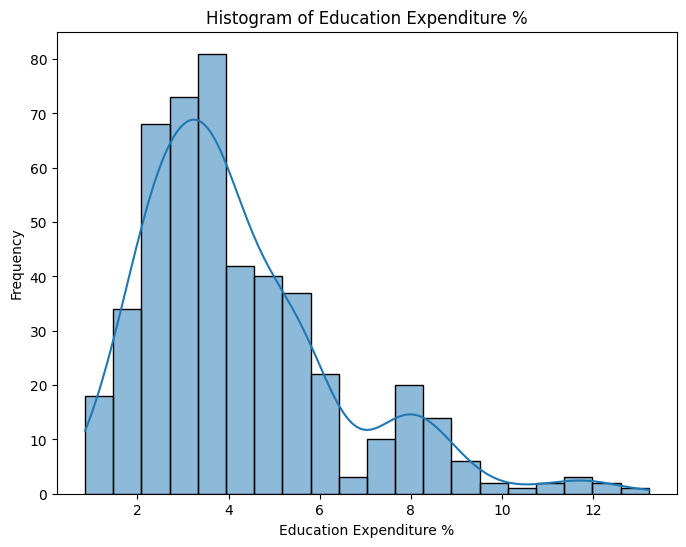

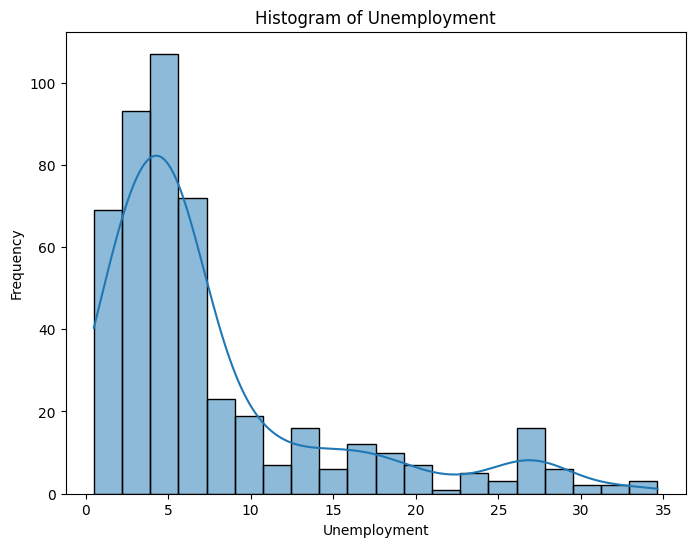

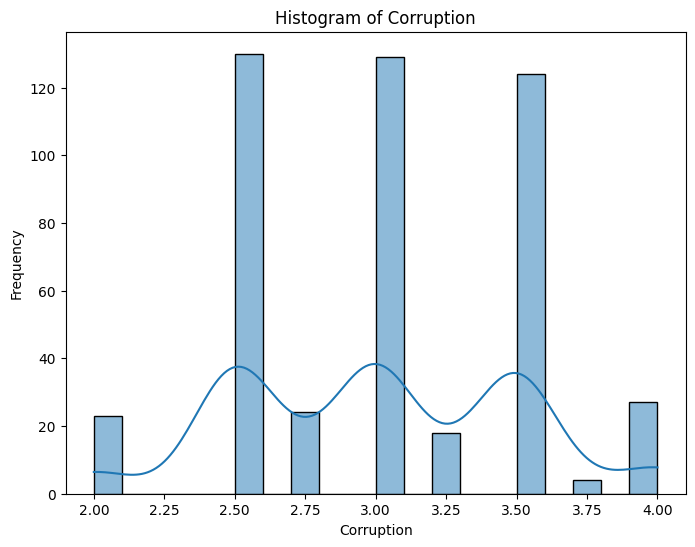

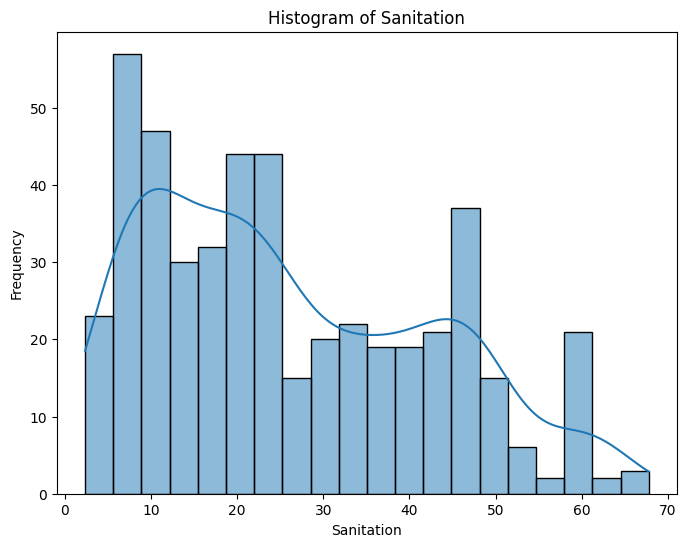

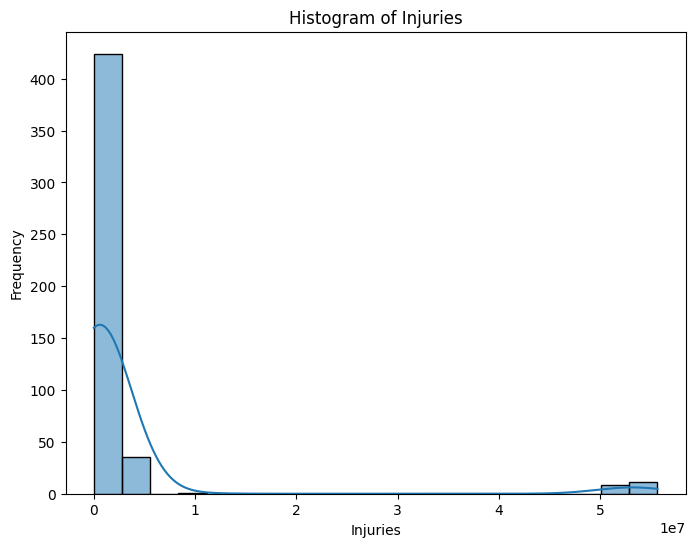

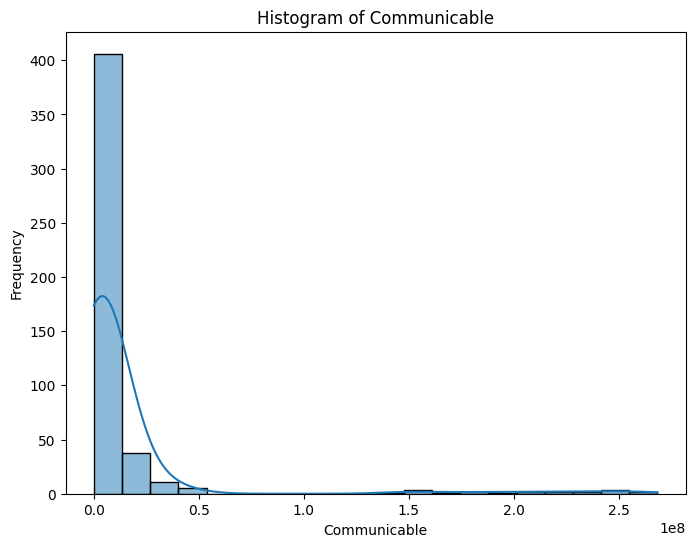

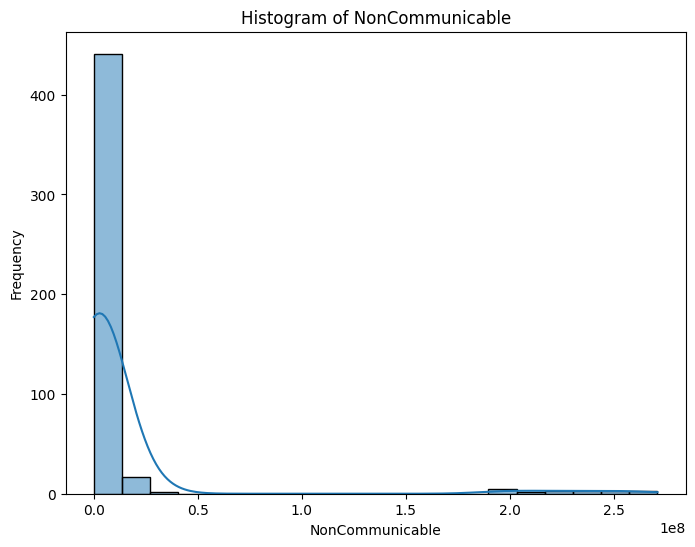

In [81]:
# Visualizations
# Histograms
numerical_cols = [ 'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
                  'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
                  'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

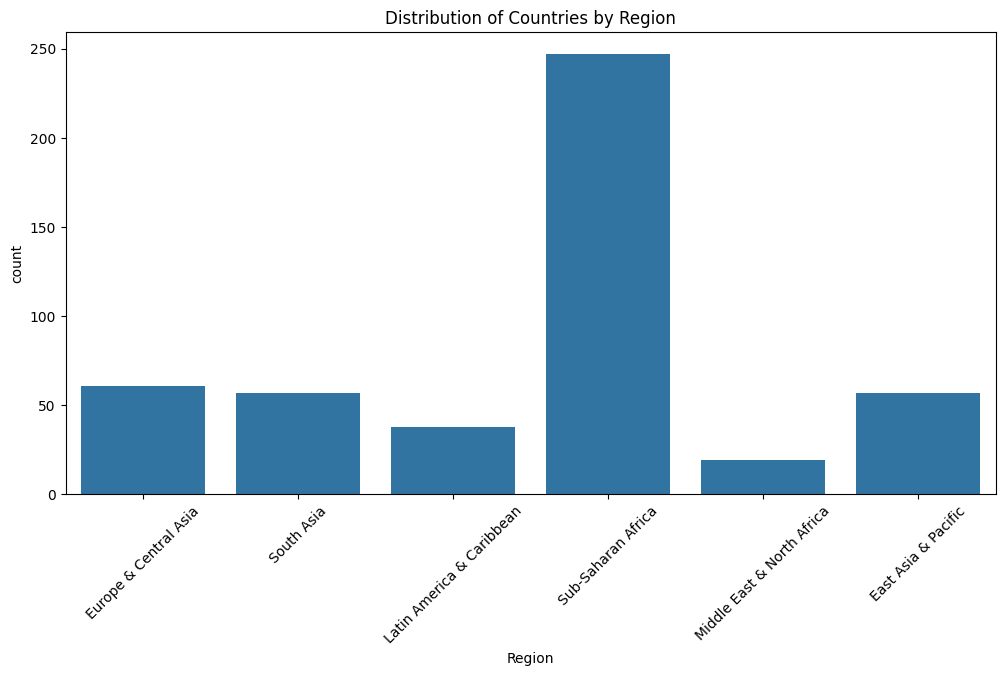

In [85]:
# Distribution of categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=data_df)
plt.title('Distribution of Countries by Region')
plt.xticks(rotation=45)
plt.show()






<Figure size 1200x800 with 0 Axes>

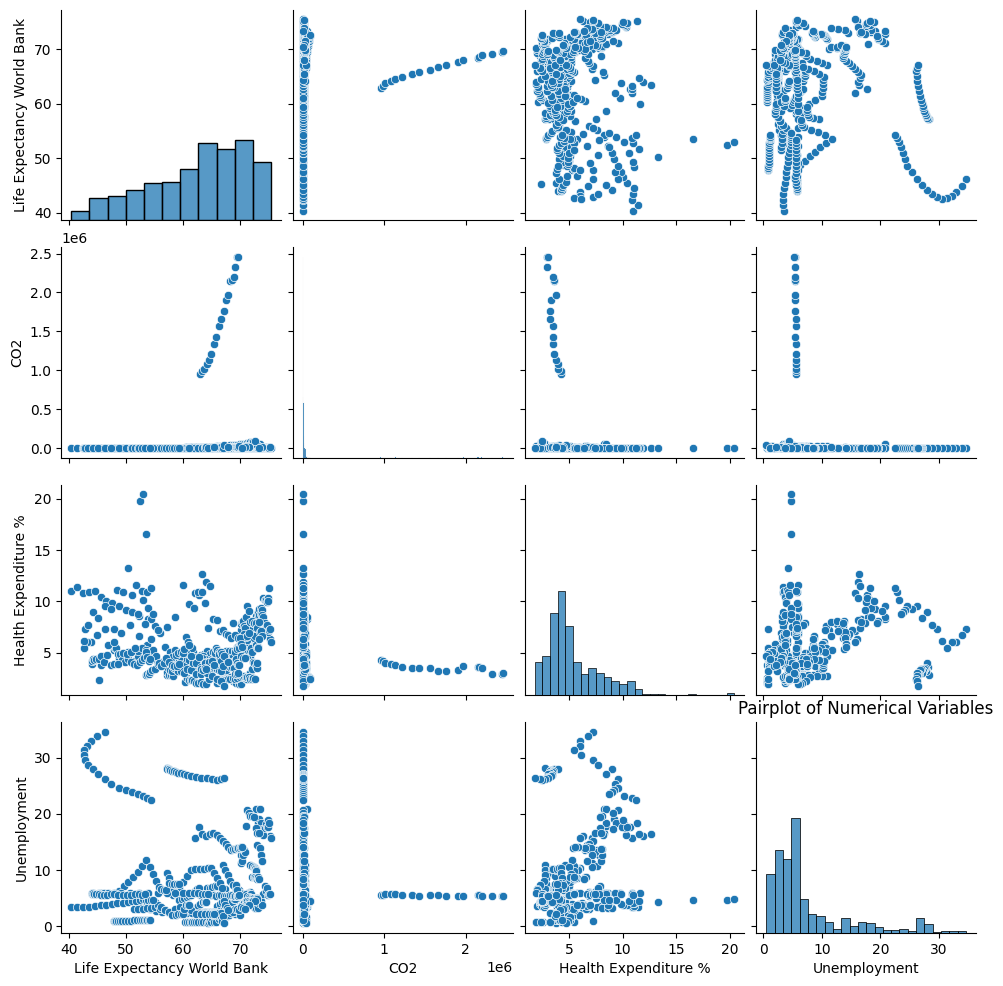

In [84]:
# Relationship between variables
plt.figure(figsize=(12, 8))
sns.pairplot(data_df[['Life Expectancy World Bank', 'CO2', 'Health Expenditure %', 'Unemployment']])
plt.title('Pairplot of Numerical Variables')
plt.show()


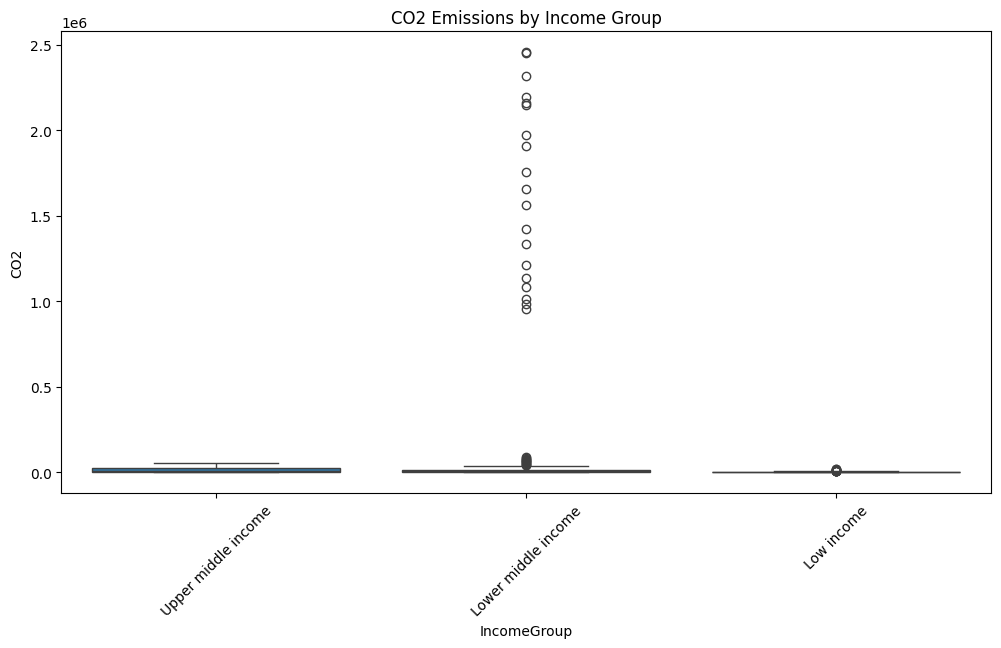

In [83]:
# Outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(x='IncomeGroup', y='CO2', data=data_df)
plt.title('CO2 Emissions by Income Group')
plt.xticks(rotation=45)
plt.show()



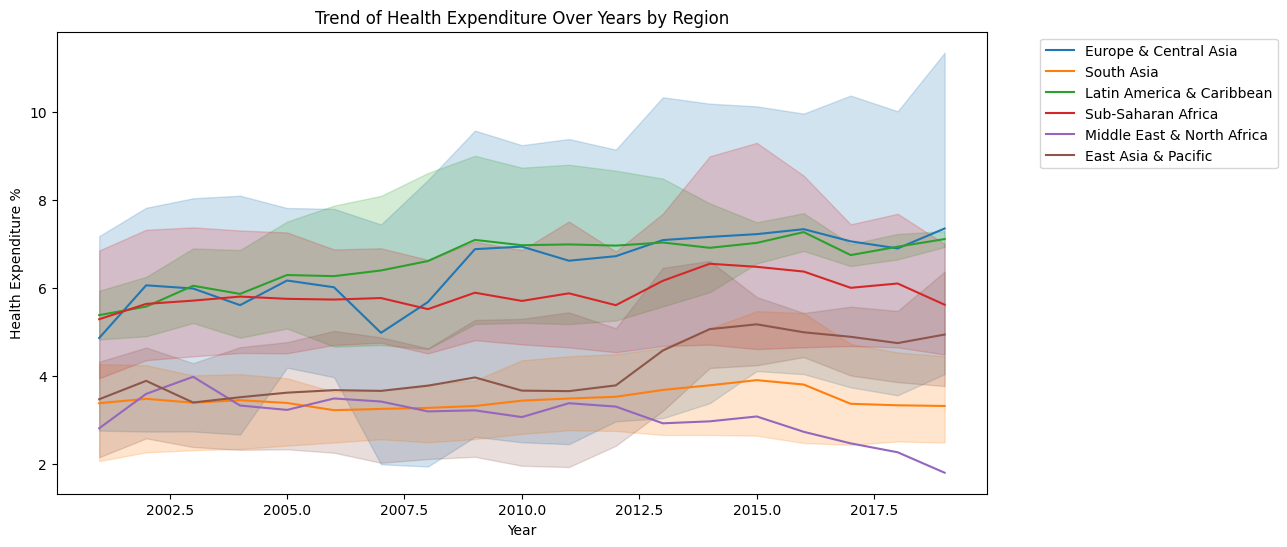

In [82]:
# Time series analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Health Expenditure %', hue='Region', data=data_df)
plt.title('Trend of Health Expenditure Over Years by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


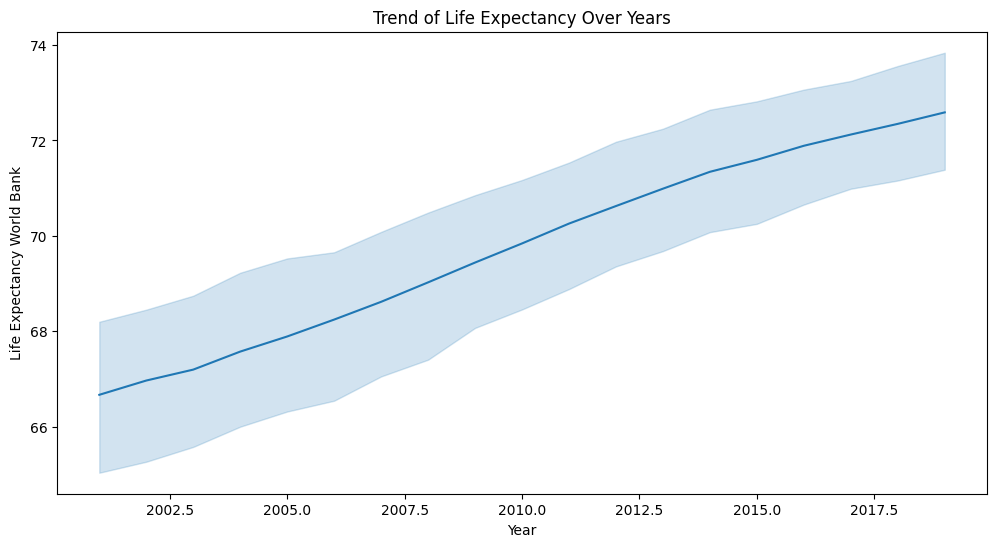

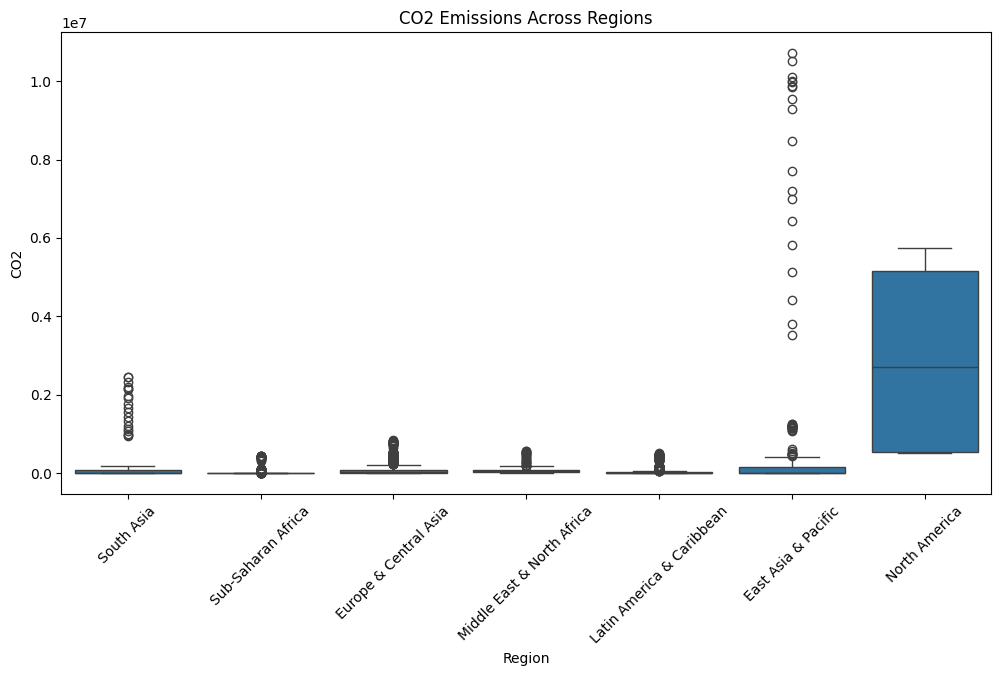

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life Expectancy World Bank', data=data_df)
plt.title('Trend of Life Expectancy Over Years')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='CO2', data=data_df)
plt.title('CO2 Emissions Across Regions')
plt.xticks(rotation=45)
plt.show()

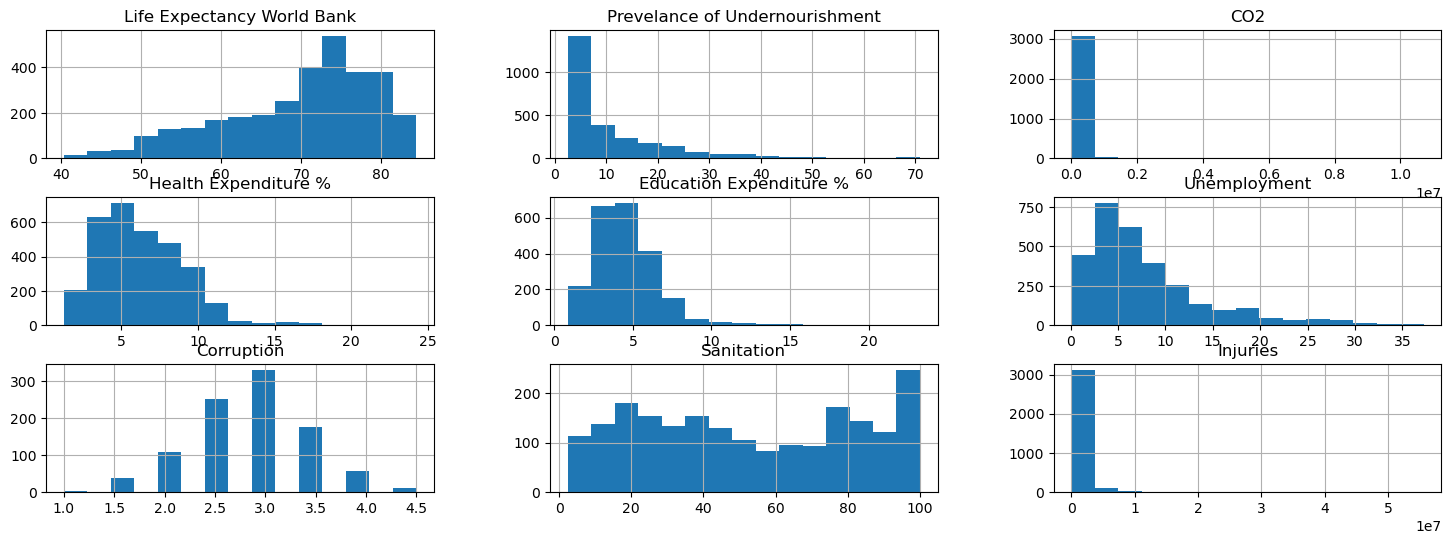

In [20]:
numerical = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment','Corruption', 'Sanitation', 'Injuries']
data_df[numerical].hist(bins=15, figsize=(18, 6), layout=(3, 3))
plt.show()

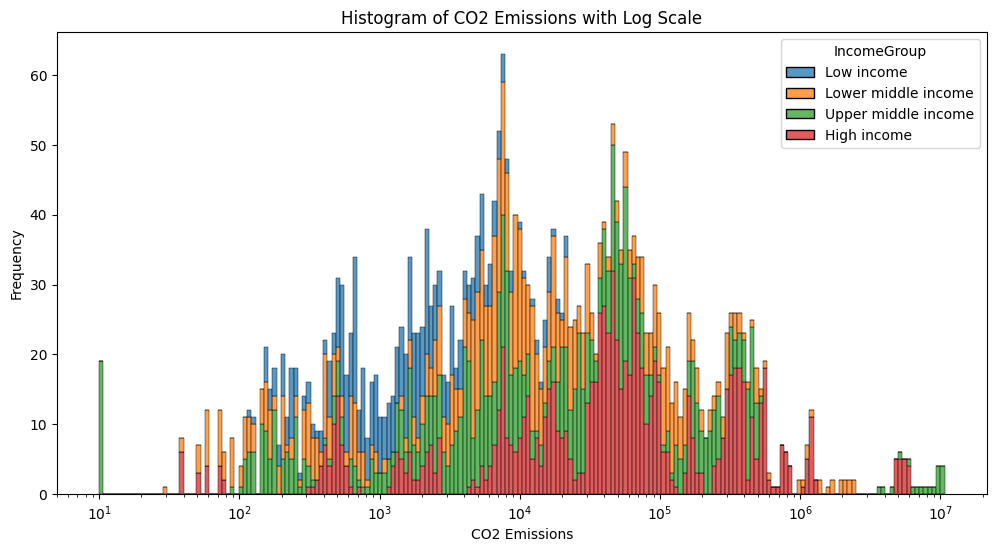

In [30]:
data_df1 = data_df.copy()

data_df2 = data_df1[data_df1['CO2'] > 100000]

plt.figure(figsize=(12, 6))
sns.histplot(data=data_df1, x='CO2', hue='IncomeGroup', bins=200, kde=False, multiple='stack', log_scale=True)
plt.title('Histogram of CO2 Emissions with Log Scale')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()


In [28]:
print(data_df.columns)

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')


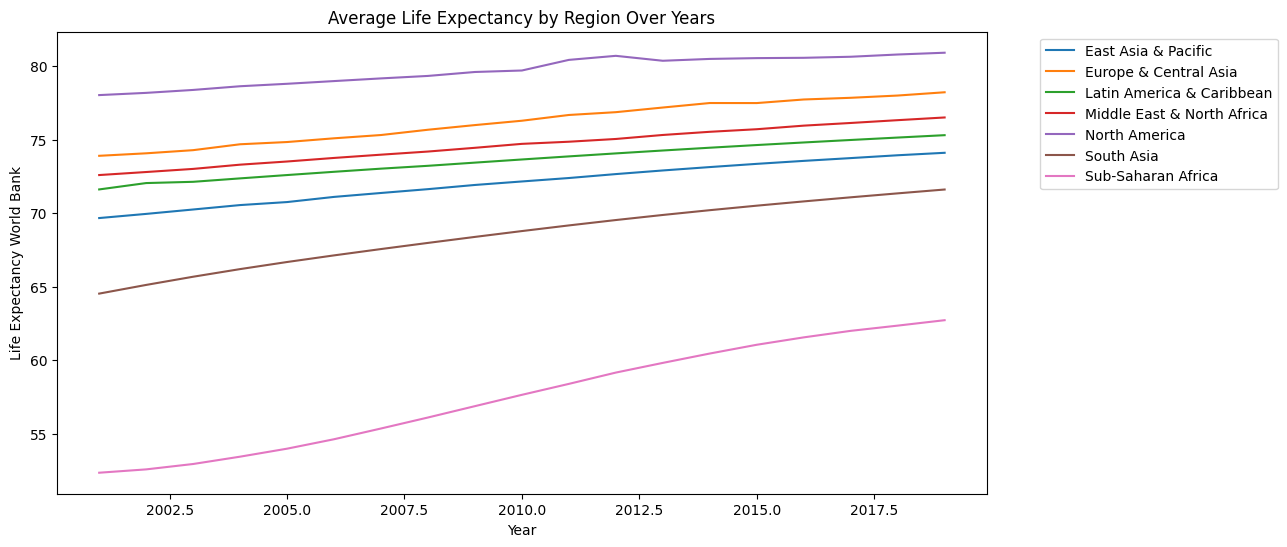

In [33]:
# Convert 'Life Expectancy World Bank' to numeric (if needed)
data_df['Life Expectancy World Bank'] = pd.to_numeric(data_df['Life Expectancy World Bank'], errors='coerce')

# Group by Year and Region
grouped_data = data_df.groupby(['Year', 'Region'])['Life Expectancy World Bank'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life Expectancy World Bank', hue='Region', data=grouped_data)
plt.title('Average Life Expectancy by Region Over Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Diagnostic Analysis**

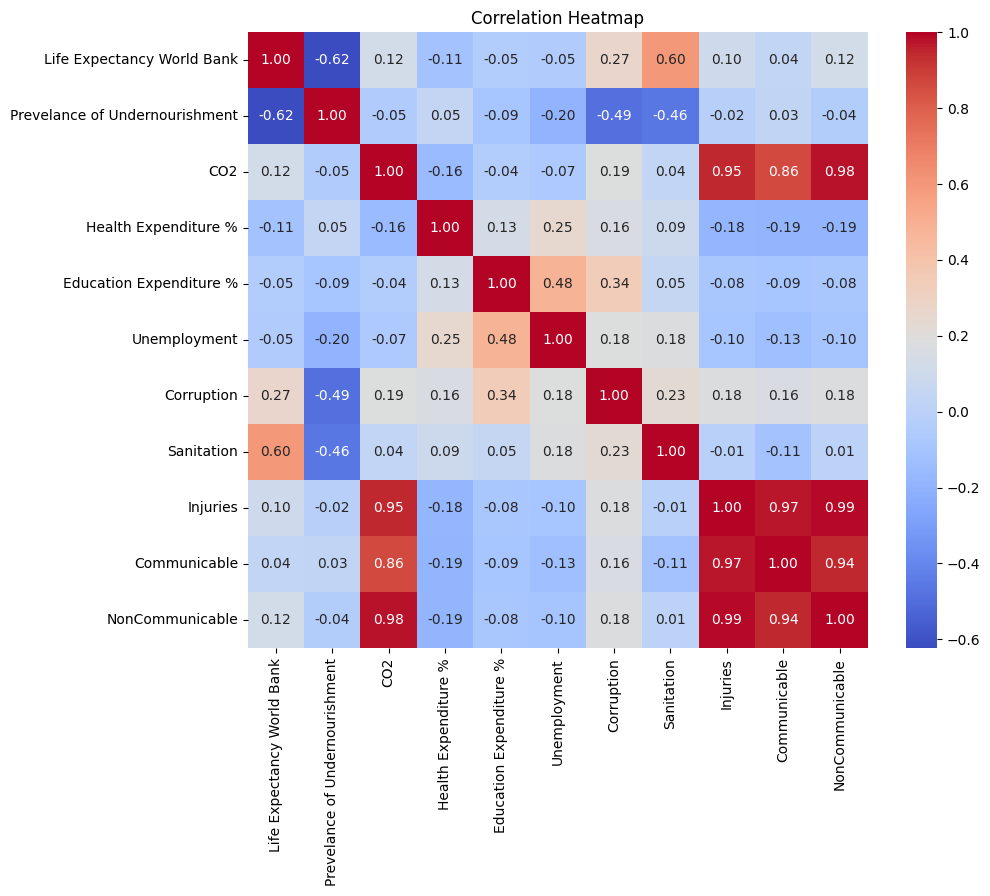

In [115]:
# Heatmap of correlations
correlation_matrix = data_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [121]:
threshold = 0.7

high_corr_cols = correlation_matrix[abs(correlation_matrix) > threshold].stack().index.tolist()

print('HIGHLY CORRELATED FEATURES\n')
for col1, col2 in high_corr_cols:
    if col1 != col2:
        print(f"{col1} - {col2}: {correlation_matrix.loc[col1, col2]}")



HIGHLY CORRELATED FEATURES

CO2 - Injuries: 0.9473780324434572
CO2 - Communicable: 0.8605218690453407
CO2 - NonCommunicable: 0.9770316183487515
Injuries - CO2: 0.9473780324434572
Injuries - Communicable: 0.9730666427443292
Injuries - NonCommunicable: 0.9910612213929086
Communicable - CO2: 0.8605218690453407
Communicable - Injuries: 0.9730666427443292
Communicable - NonCommunicable: 0.9430736091461965
NonCommunicable - CO2: 0.9770316183487515
NonCommunicable - Injuries: 0.9910612213929086
NonCommunicable - Communicable: 0.9430736091461965


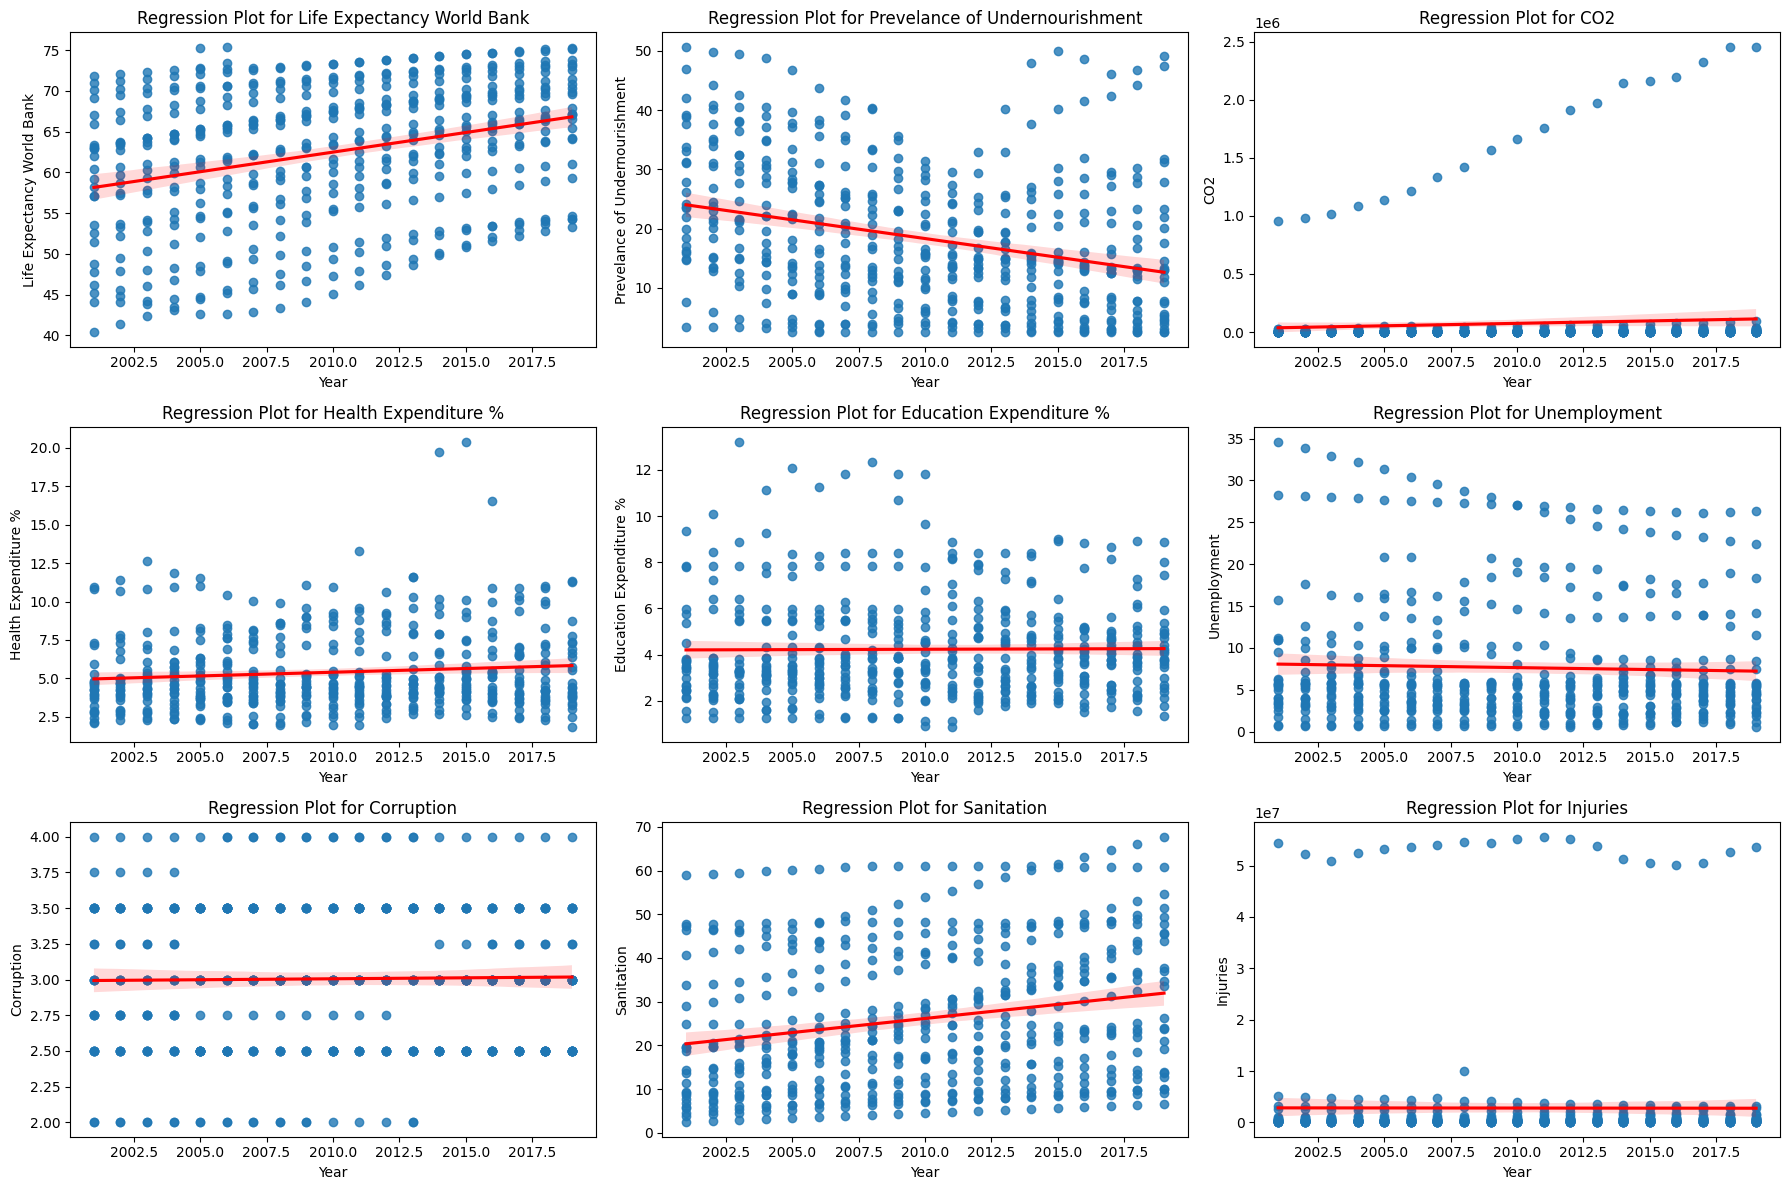

In [93]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the columns for regression analysis
columns_for_regression = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
                           'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
                           'Corruption', 'Sanitation', 'Injuries']

# Initialize the linear regression model
model = LinearRegression()

# Create subplots for each regression plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Iterate over each column and plot the regression line
for i, col_name in enumerate(columns_for_regression):
    row, col = divmod(i, 3)
    sns.regplot(x='Year', y=col_name, data=data_df, ax=axes[row, col], line_kws={"color":"red"})
    axes[row, col].set_title(f'Regression Plot for {col_name}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


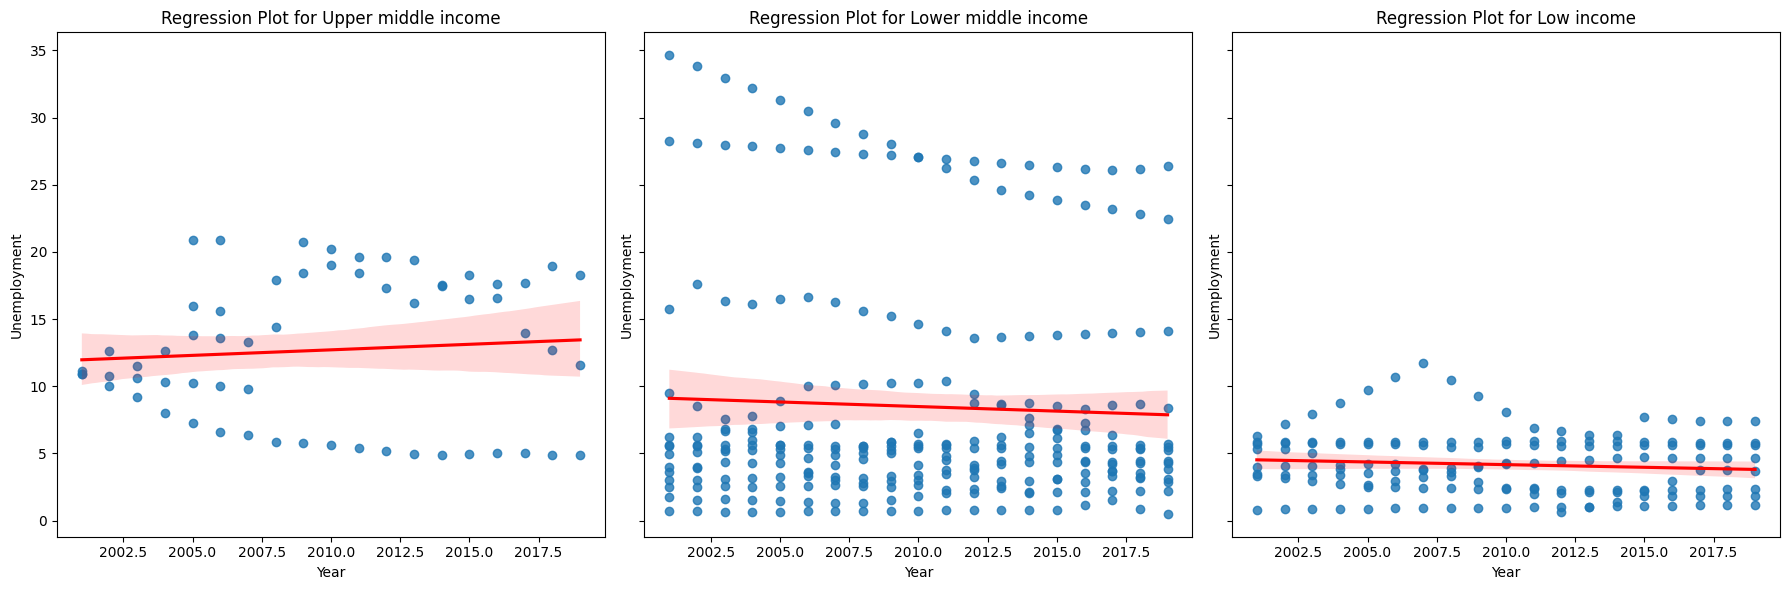

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


income_groups = data_df['IncomeGroup'].unique()

for i, income_group in enumerate(income_groups):
    group_data = data_df[data_df['IncomeGroup'] == income_group]
    sns.regplot(x='Year', y='Unemployment', data=group_data, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Regression Plot for {income_group}')
    if i == 0:
        axes[i].set_ylabel('Unemployment')

plt.tight_layout()
plt.show()


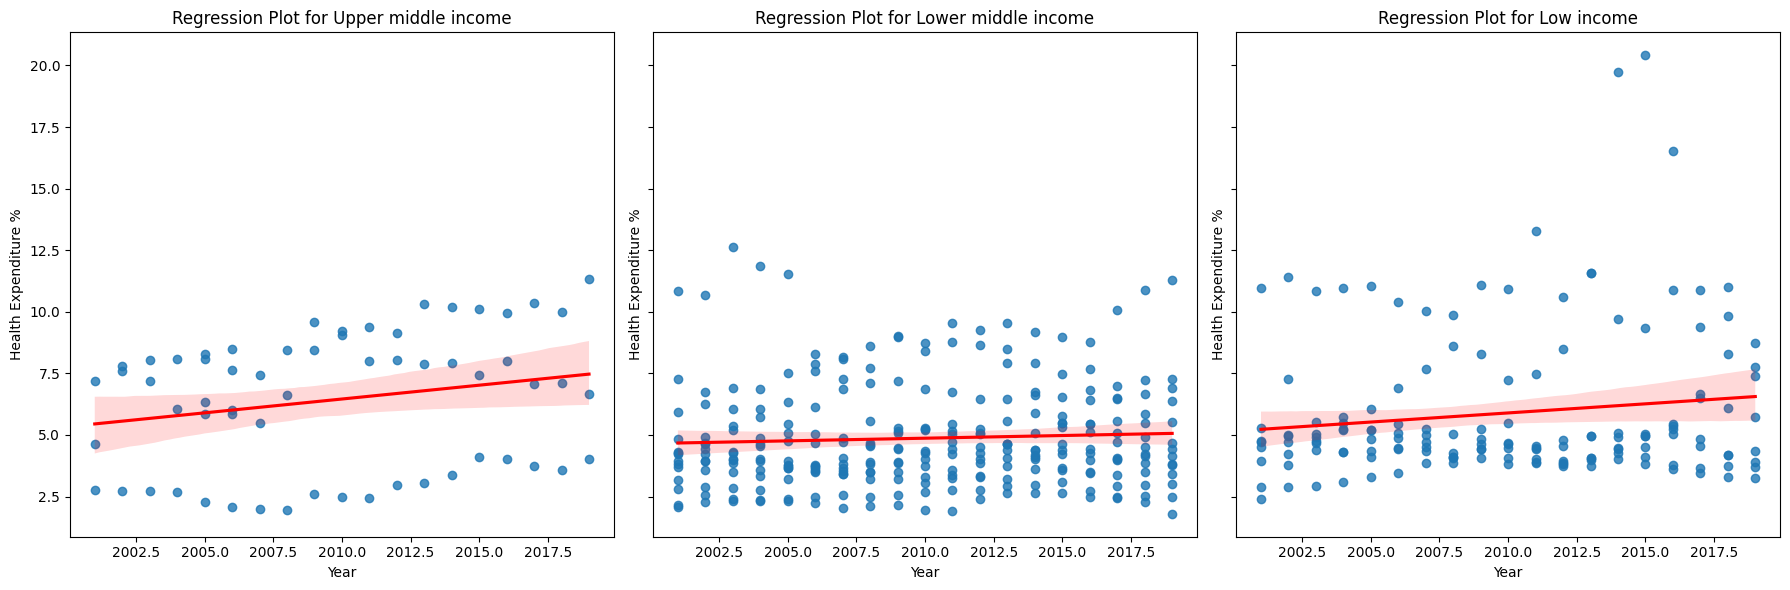

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


income_groups = data_df['IncomeGroup'].unique()

for i, income_group in enumerate(income_groups):
    group_data = data_df[data_df['IncomeGroup'] == income_group]
    sns.regplot(x='Year', y='Health Expenditure %', data=group_data, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Regression Plot for {income_group}')
    if i == 0:
        axes[i].set_ylabel('Health Expenditure %')

plt.tight_layout()
plt.show()


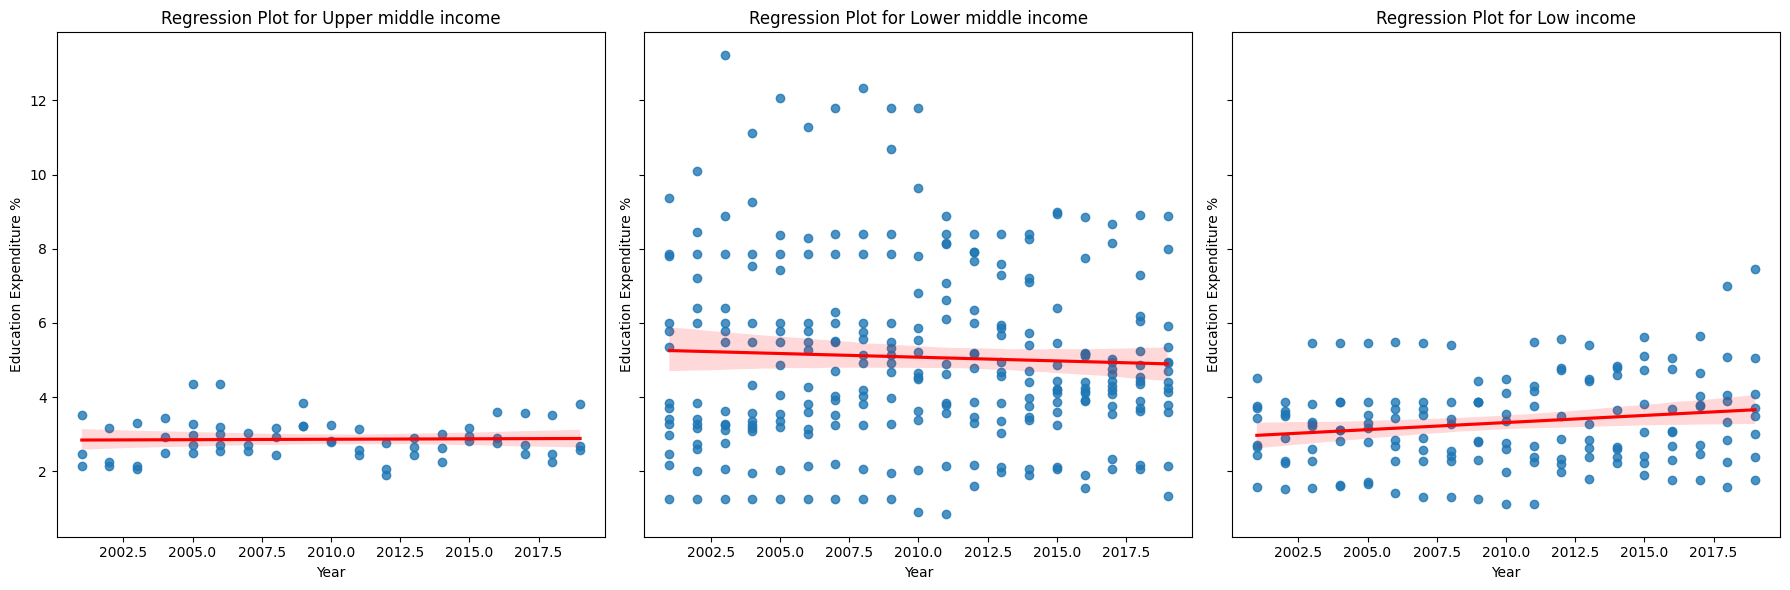

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


income_groups = data_df['IncomeGroup'].unique()

for i, income_group in enumerate(income_groups):
    group_data = data_df[data_df['IncomeGroup'] == income_group]
    sns.regplot(x='Year', y='Education Expenditure %', data=group_data, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Regression Plot for {income_group}')
    if i == 0:
        axes[i].set_ylabel('Education Expenditure %')

plt.tight_layout()
plt.show()
